In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [54]:
#filepath = 'triangle.png' #'zener_star.jpg' 
filepath = 'zener_star.jpg' 
src = cv2.imread(filepath)

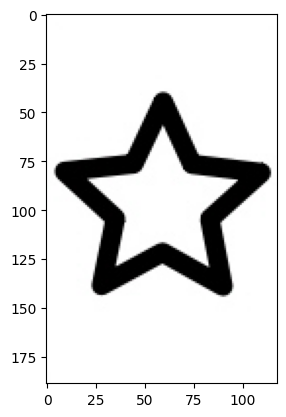

In [56]:
plt.imshow(src)

In [87]:
rows, cols, channels = src.shape

# Rotation 변화, Invariant?
M = cv2.getRotationMatrix2D( (cols/2, rows/4),  45, 1.5 )  # center, rotation, scale 
src1 = cv2.warpAffine( src, M, (cols*4//2, rows*2//2), borderValue=(255, 255, 255))  # 변형하고 주변을 하얀색으로 채움 

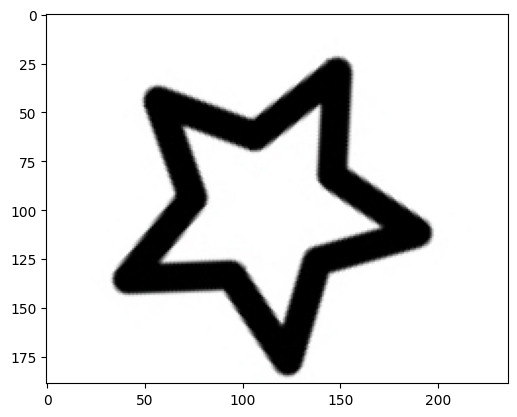

In [88]:
plt.imshow(src1)

In [89]:
gray = cv2.cvtColor(src1, cv2.COLOR_BGR2GRAY)

In [90]:
bs = 7;  #5
res = cv2.cornerHarris(gray, blockSize=bs, ksize=3, k=0.04)

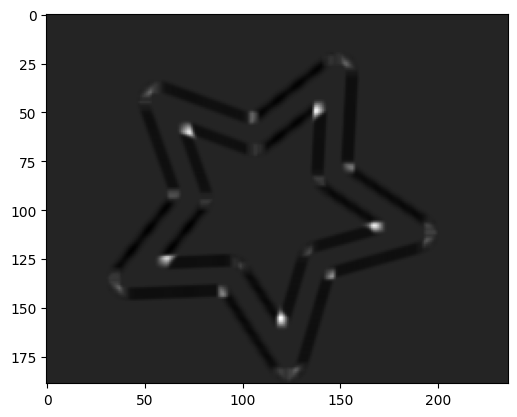

In [91]:
plt.imshow(res, cmap='gray')

In [92]:
T_harris = 0.01 #0.02
ret, res_bin = cv2.threshold(res, T_harris, 255, cv2.THRESH_BINARY)
res_bin = cv2.dilate(res_bin, None) # 3x3 rect kernel
res_bin = np.uint8(res_bin)

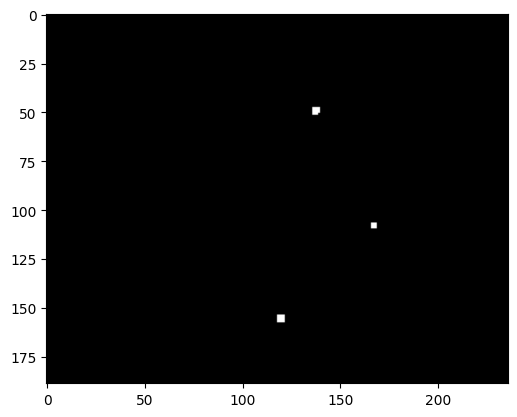

In [93]:
plt.imshow(res_bin, cmap='gray')

In [94]:
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(res_bin)
print('centroids.shape=', centroids.shape)
print('centroids=',centroids)
centroids = np.float32(centroids[1:, :])  # 배경영역제거 

centroids.shape= (4, 2)
centroids= [[117.48258684  93.99010412]
 [137.4         49.4       ]
 [167.         108.        ]
 [119.5        155.5       ]]


In [95]:
term_crit=(cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS,10, 0.001)
corners = cv2.cornerSubPix(gray, centroids, (5,5), (-1,-1), term_crit)
print('corners=',corners)

corners= [[139.75645   46.099087]
 [171.05441  108.96658 ]
 [120.298294 158.882   ]]


In [96]:
dst = src1.copy()
for x, y in corners:    
    cv2.circle(dst, (int(x), int(y)), 1, (0,0,255), 1)

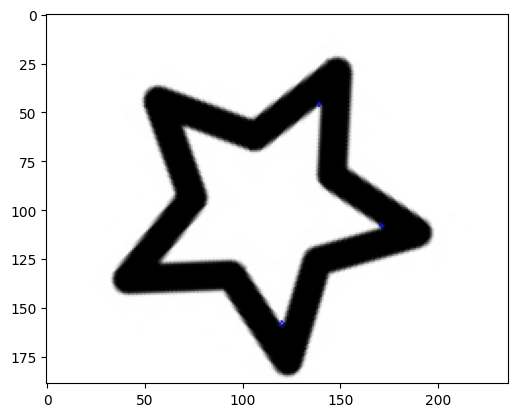

In [97]:
plt.imshow(dst)